In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg
Qt5Agg: unable to import specified backend (or its dependency); no plots


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.
Traceback (most recent call last):
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot.py", line 57, in uti_plot_init
    _backend = uti_plot_matplotlib.Backend(backend, fname_format)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 27, in __init__
    backend = self._init_ipython(backend)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 724, in _init_ipython
    get_ipython().magic('matplotlib ' + b)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.

In [3]:
exp_type = 'fwhm_lwsi'

In [8]:
#base_dir = Path(aps.__file__).parents[1]
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autoalignment")
data_base_dir = autoalign_dir / exp_type / 'denoised'
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


In [9]:
log_files = sorted(list(data_base_dir.glob('*.gz')))
hist_dirs = sorted(list(data_base_dir.glob('*steps')))
ini_files = sorted(list(data_base_dir.glob('*ini')))
image_dirs = sorted(list(data_base_dir.glob('*images')))
log_files, hist_dirs, ini_files

([PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autoalignment/fwhm_lwsi/denoised/fwhm_lwsi_moo_optimization_final_150_2022-11-19_18:36.gz')],
 [PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autoalignment/fwhm_lwsi/denoised/fwhm_lwsi_moo_150_2022-11-19_steps')],
 [PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autoalignment/fwhm_lwsi/denoised/fwhm_lwsi_moo_autofocusing.ini')])

### fwhm_lwsi

In [10]:
print(image_dirs[0], hist_dirs[0])

/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autoalignment/fwhm_lwsi/denoised/fwhm_lwsi_moo_150_2022-11-19_images /Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autoalignment/fwhm_lwsi/denoised/fwhm_lwsi_moo_150_2022-11-19_steps


Initial beam


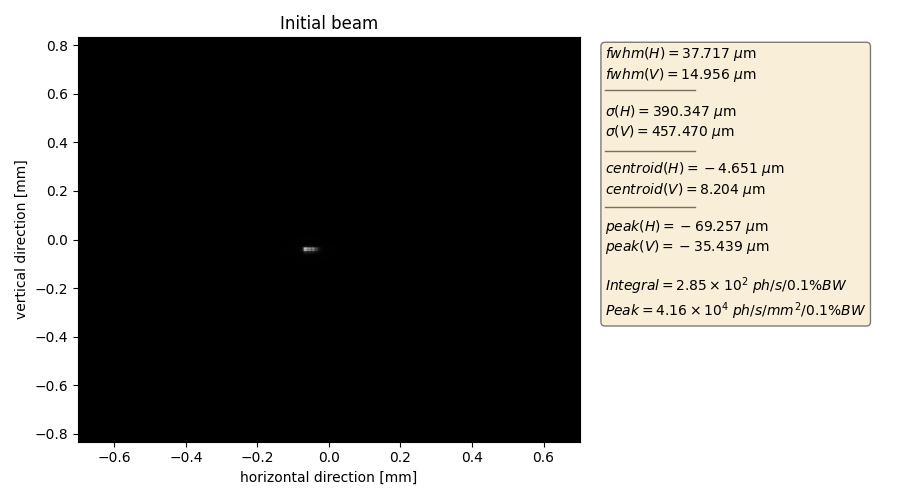

In [11]:
print("Initial beam")
reference = Image(filename= image_dirs[0] / 'Figure_1.png')
display_png(reference)

#### Experiment results

In [12]:
study = analysis.create_study_from_trials(log_files[0])

[I 2022-11-20 20:28:38,709] A new study created in memory with name: no-name-89eb599d-a480-401e-921d-fa31d3f50f87


Assuming minimization for all objectives.


In [13]:
n_steps = len(study.trials)

In [14]:
hists = analysis.load_histograms_from_files(n_steps, hist_dirs[0], extension='gz')

In [18]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [19]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[65, 124, 140, 132]
112 [0.010585718098234814, 16.28115613354708]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.26446736633360063, 'h_fwhm': 0.007153311718388622, 'h_centroid': 0.01391919889143281, 'h_peak': 0.017232978230662322, 'v_sigma': 0.2638951371921114, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.025596550470151122, 'v_peak': 0.012029699101211292, 'integral_intensity': 35.44421862847553, 'peak_intensity': 64372.44, 'gaussian_fit': {}}}


Trial number 89
Trial values: peak_distance 2.094e-02 fwhm 1.625e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.26155118246727455, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.011019976945040394, 'h_peak': 0.018533580361278303, 'v_sigma': 0.2635016385063346, 'v_fwhm': 0.009103556076592856, 'v_centroid': 0.003604260263320669, 'v_peak': 0.04779366940211012, 'integral_intensity': 34.85489941926752, 'peak_intensity': 64266.727, 'gaussian_fit': {}}}


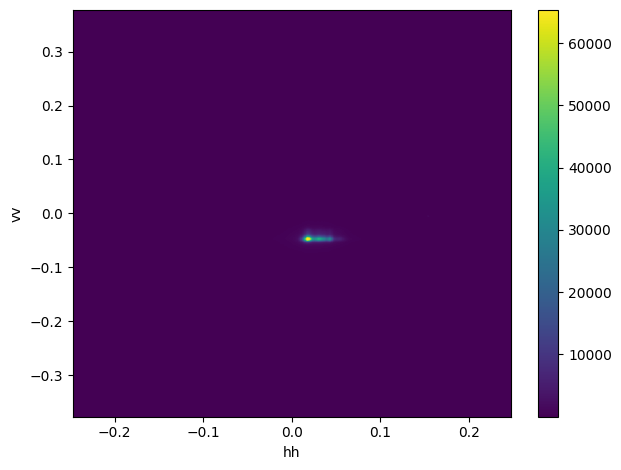

Trial number 100
Trial values: peak_distance 8.845e-03 fwhm 1.636e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.2695094113474316, 'h_fwhm': 0.007153311718388622, 'h_centroid': 0.002091744794242026, 'h_peak': -0.005527559055118184, 'v_sigma': 0.26815243094905505, 'v_fwhm': 0.005202032043767346, 'v_centroid': 0.06179057065324835, 'v_peak': -0.05494646346229, 'integral_intensity': 36.43202500947245, 'peak_intensity': 64496.785, 'gaussian_fit': {}}}


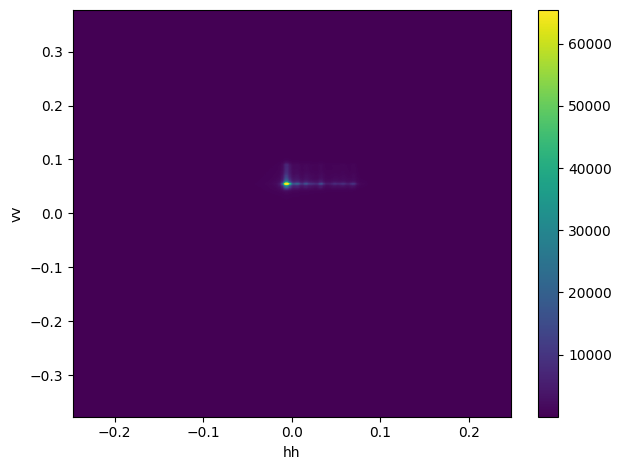

Trial number 112
Trial values: peak_distance 1.059e-02 fwhm 1.628e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.26446736633360063, 'h_fwhm': 0.007153311718388622, 'h_centroid': 0.01391919889143281, 'h_peak': 0.017232978230662322, 'v_sigma': 0.2638951371921114, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.025596550470151122, 'v_peak': 0.012029699101211292, 'integral_intensity': 35.44421862847553, 'peak_intensity': 64372.44, 'gaussian_fit': {}}}


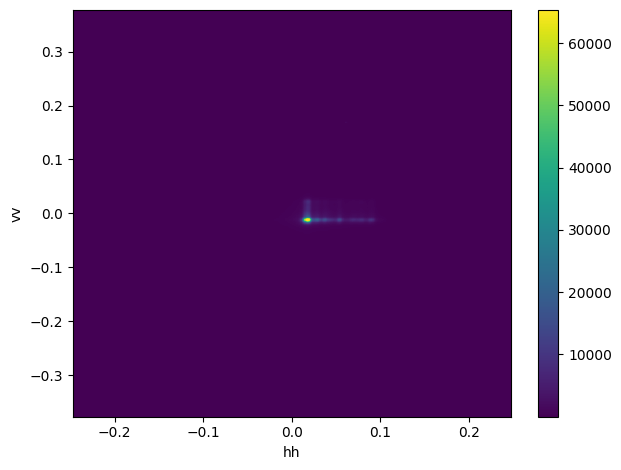

Trial number 116
Trial values: peak_distance 1.016e-02 fwhm 1.634e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.2682868820582257, 'h_fwhm': 0.0078036127836966784, 'h_centroid': 0.011665737247813307, 'h_peak': 0.011380268642890178, 'v_sigma': 0.2693604396980465, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.04130490726083945, 'v_peak': -0.01658147713950765, 'integral_intensity': 35.97382649960259, 'peak_intensity': 64478.406, 'gaussian_fit': {}}}


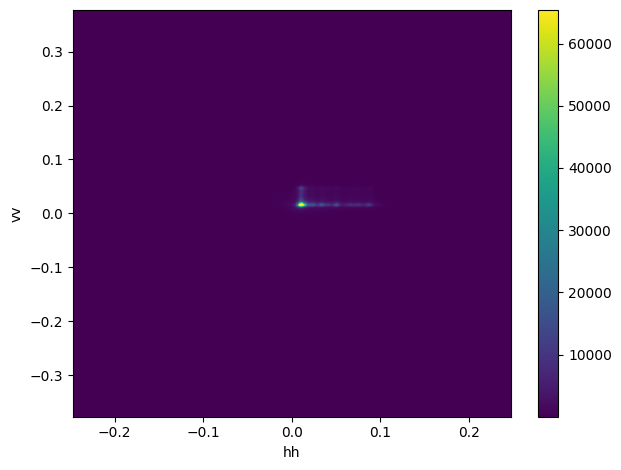

In [15]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_85461/1292482367.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["fwhm", "lwsi"],


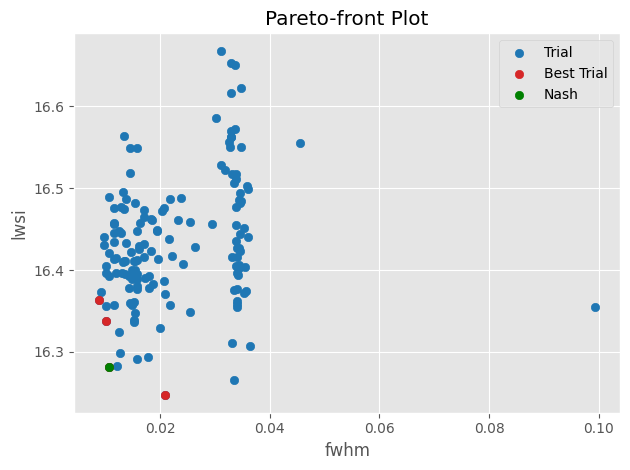

In [21]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["fwhm", "lwsi"], 
                                                  include_dominated_trials=True)
plt.scatter(*nash_trial.values, color='green', label='Nash')
#plt.ylim(-11.14, -10.9)
#plt.xlim(0, 0.005)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_85461/2275970600.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0],


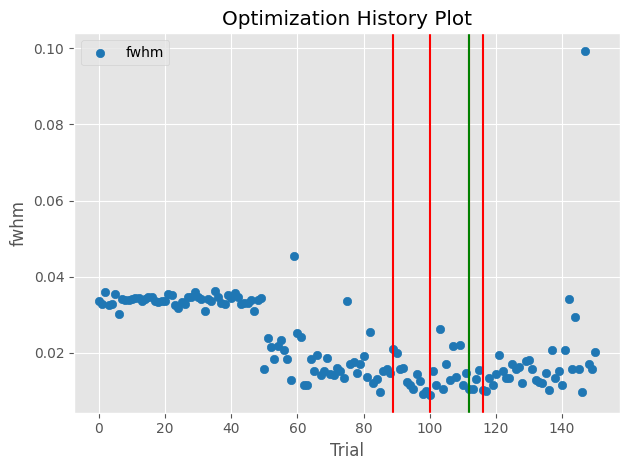

In [22]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], 
                                                          target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_85461/2457724956.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1],


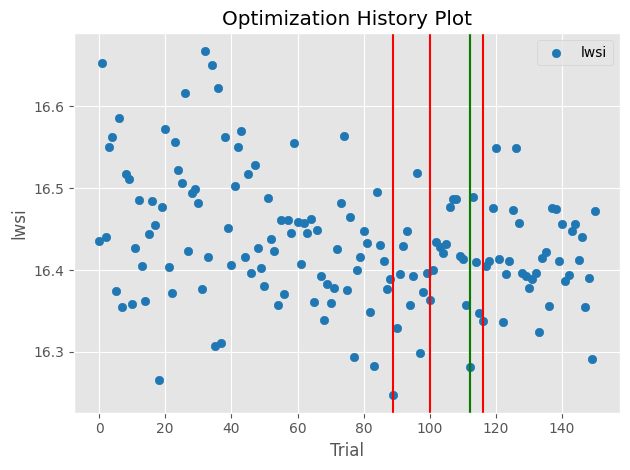

In [23]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], 
                                                          target_name="lwsi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [24]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0, power=2)
    isum2, wsum2 = analysis.calculate_weighted_sum(h, power=2)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_85461/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


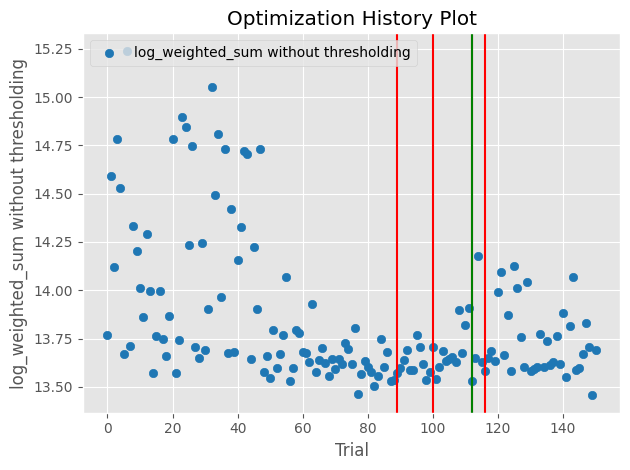

In [25]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_85461/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


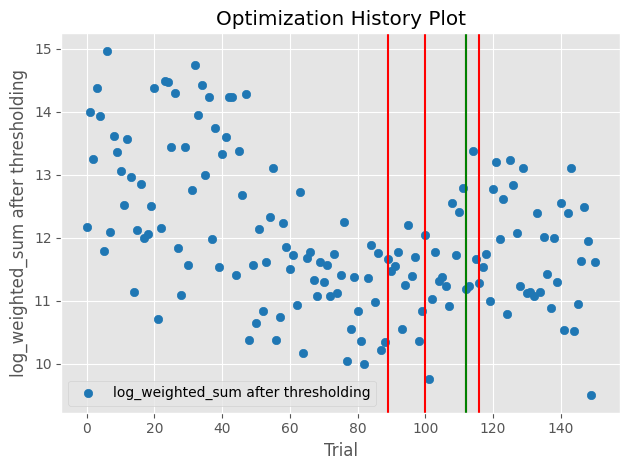

In [26]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [30]:
test_val_fns = [lambda t: t.values[0], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins))

98


88 [0.014828741393486087, 10.344390227303586]


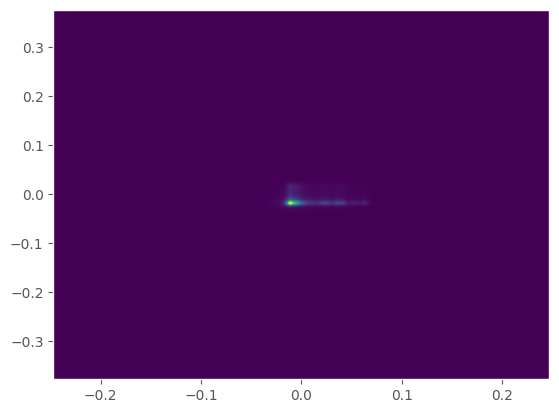

98 [0.00924211406476635, 10.359836803106012]


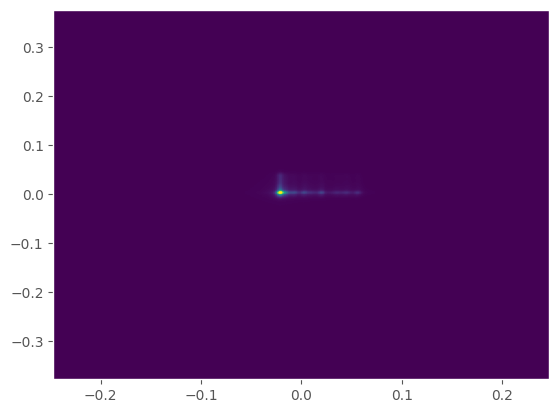

100 [0.008844829332712885, 12.047952533361933]


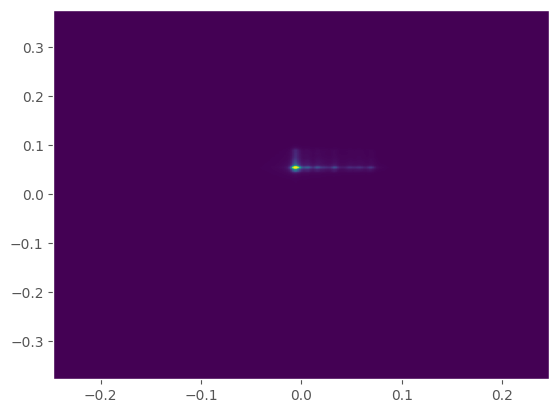

101 [0.015347265421237006, 9.758362332946643]


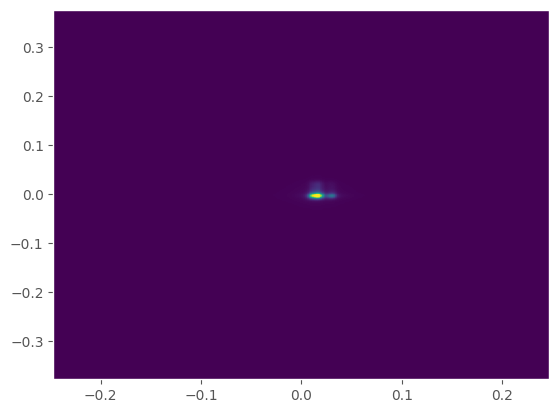

149 [0.01574168459178354, 9.498499390109345]


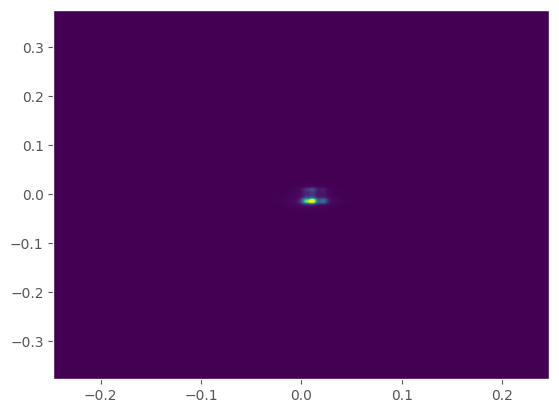

In [28]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [31]:
study.directions

[<StudyDirection.MINIMIZE: 1>, <StudyDirection.MINIMIZE: 1>]

In [36]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_peak_distance_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

98 127


77 [0.01768965866542577, 0.0010281492985236974, 10.043403356214299]


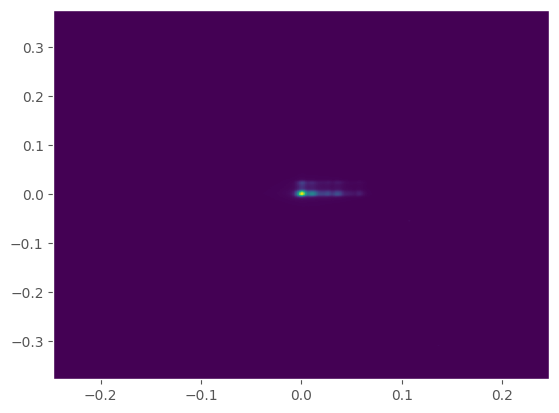

78 [0.014828477238557933, 0.017012801507936593, 10.545865200753465]


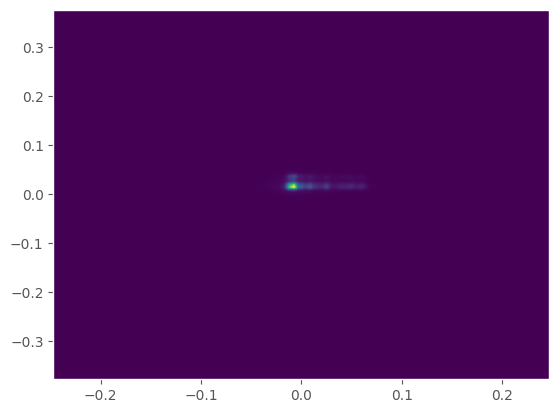

82 [0.02550287720867942, 0.014518624367305851, 9.992367763506598]


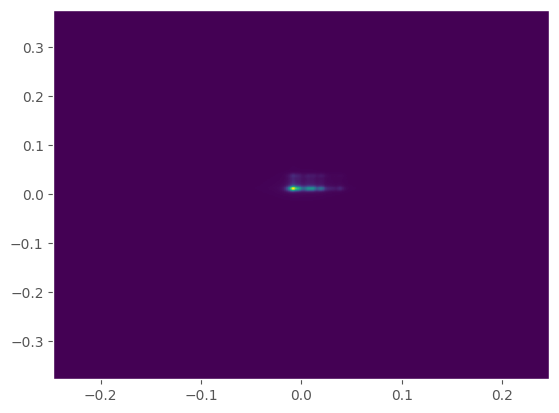

85 [0.009754261862385233, 0.020874622576285695, 10.986845576851817]


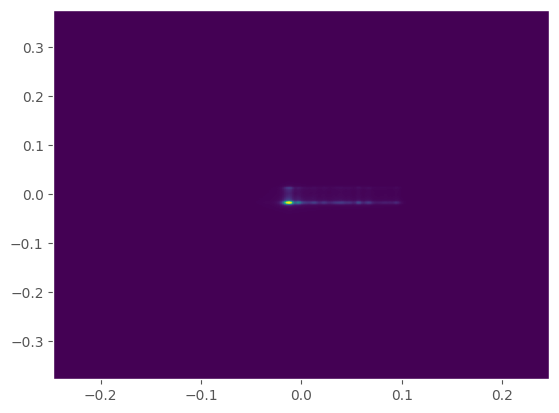

87 [0.01571504060843755, 0.004888082759842994, 10.221318386438046]


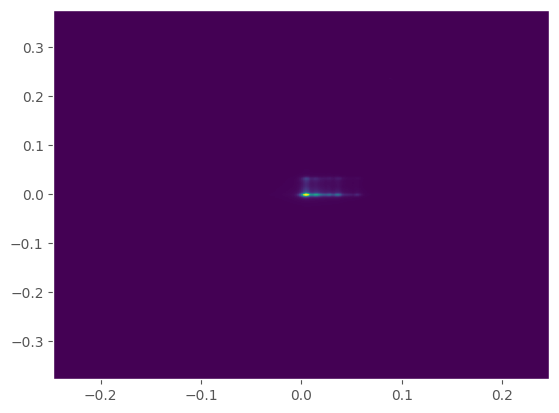

88 [0.014828741393486087, 0.021414389843004814, 10.344390227303586]


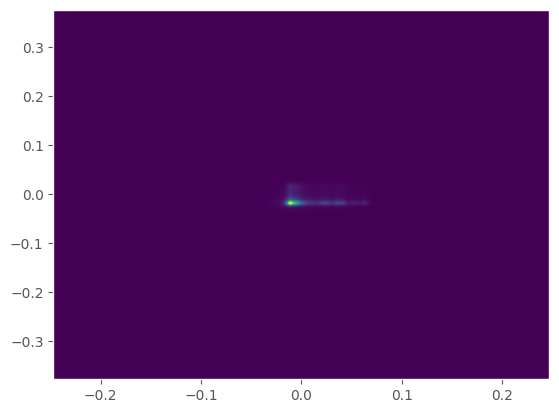

93 [0.012491522769924353, 0.0120344282062201, 10.56136819081959]


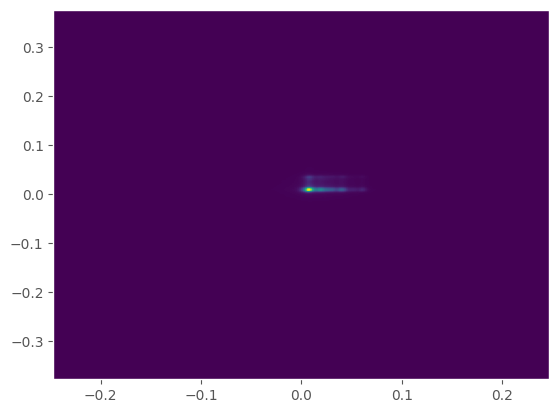

96 [0.014438340187668017, 0.004239225907192193, 11.395332229401312]


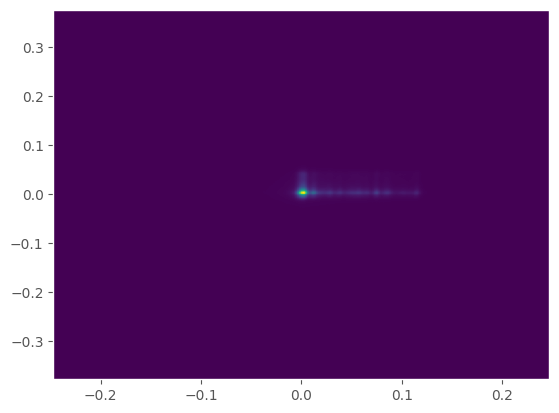

98 [0.00924211406476635, 0.02155327585348247, 10.359836803106012]


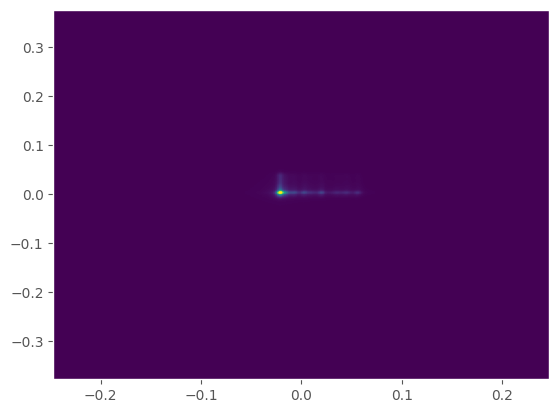

100 [0.008844829332712885, 0.055223797009265746, 12.047952533361933]


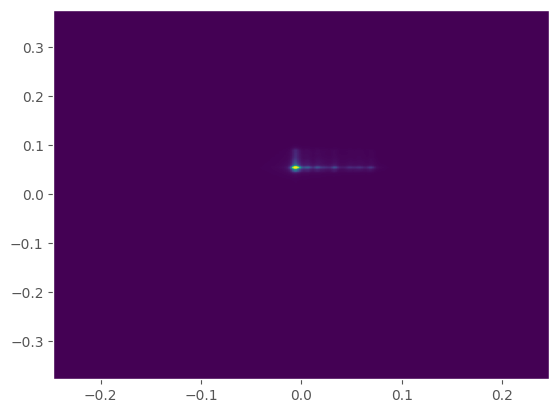

101 [0.015347265421237006, 0.01632884637413689, 9.758362332946643]


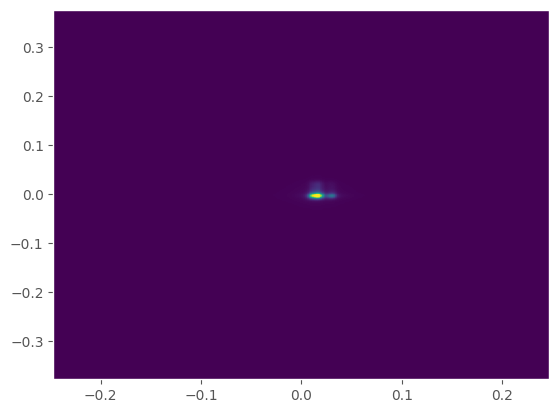

116 [0.01015772610582563, 0.02011108894397228, 11.278377059365647]


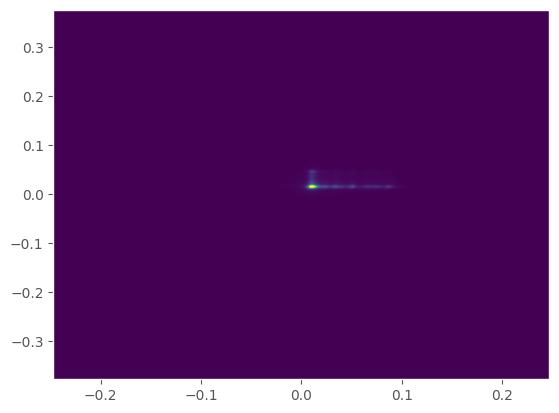

149 [0.01574168459178354, 0.018026752548524795, 9.498499390109345]


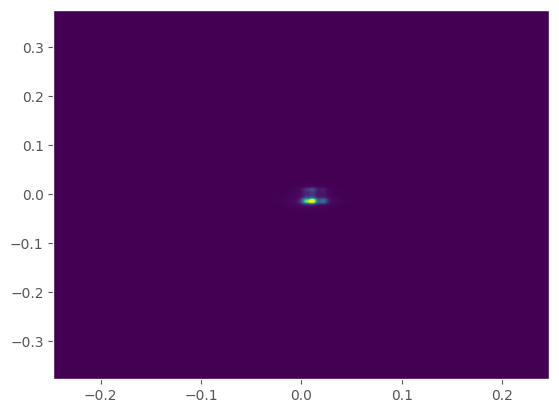

In [35]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()